## Import library

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import copy as cp
import calendar
from datetime import timedelta

In [2]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

In [3]:
def strtoint(s):
   #print(s)
    if type(s) != str :
        return s
    ss = s.split(',')
    #print(ss[0])
    temp = 0
    for i in range(len(ss)):
        temp = temp * 1000 + int(ss[i])
#     temp = float(temp / 1000000)
    return temp

## Build a library

In [4]:
transportCnt = dict()

In [5]:
year = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [6]:
for i in year:
    for j in month:
        if i == '2022' and j == '04':
            break
        dt_name = '+OÑ_¦¦¦BÑ¦¿t¦+«+¦B¦q¦+¡p_' + i + j+'.csv'
        df = pd.read_csv(dt_name,encoding='big5')
        for k in range(df.shape[0]):
            tmp = df['營運日'][k]
            if(tmp != tmp):
                continue
            tmp = df['營運日'][k].split('/')
            date = datetime(int(tmp[0]) + 1911, int(tmp[1]), int(tmp[2]))
            transport = strtoint(df['總運量'][k])
            transportCnt.setdefault(date,transport)

## Functions

In [7]:
def getHoliday(year, Holiday, df):
    name = []
    y = year
    i = year - 2005
    if(type(df[Holiday][i]) == datetime):
        name.append(df[Holiday][i])
    else:
        start, end = df[Holiday][i].split('-')
        start = start.split('/')
        start = [int(s) for s in start]
        end = end.split('/')
        end = [int(s) for s in end]

        if(start[0] == end[0]):
            name += [datetime(y, start[0], x) for x in np.arange(start[1], end[1] + 1, 1)]
        else:
            lastday = calendar.monthrange(y, start[0])[1]
            if(start[0] == 12):
                name += [datetime(y - 1, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
            else:
                name += [datetime(y, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
            name += [datetime(y, end[0], x) for x in np.arange(1, end[1] + 1, 1)]
    return name

In [8]:
def getHolidayLength(date):
    holiday, column, i = isHoliday([date.year], h_columns, date)
    if(holiday):
        return df[column][i]
    elif(date.isoweekday() == 6 or date.isoweekday() == 7):
        return 2
    else:
        return 0

In [9]:
def isHoliday(years, columns, date):
    for column in columns:
        for year in years:
            if(date in holiday_rec[column][year - 2005]):
                return True, column, year - 2005
    return False, -1, -1

In [10]:
def holiday_type(date):
    y = date.year
    m = date.month
    d = date.day
    traditional = ['春節', '端午', '中秋']
    national = ['雙十', '二二八', '元旦', '清明', '勞動']
    years = np.arange(2015, 2023, 1)
    if(isTyphoon(date) or ((m == 12) and (d == 31))):
        return
    elif(isHoliday(years, traditional, date)[0]):
        return 'Traditional'
    elif(isHoliday(years, national, date)[0]):
        return 'National'
    elif((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return 'Western'
    elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
        return 'Fother'
    elif(date.isoweekday() == 6 or date.isoweekday() == 7):
        return 'Weekend'
    else:
        return 'Weekday'

In [11]:
def season(date):
    s = []
    start = 3
    for i in range( 4 ) : 
        s.append( [])
        for j in range( 3 ) :
            s[i].append( start ) 
            start = ( start % 12 ) + 1
    m = date.month
    if(m in s[0]):
        return 'Spring'
    elif(m in s[1]):
        return 'Summer'
    elif(m in s[2]):
        return 'Fall'
    else:
        return 'Winter'

In [12]:
def season2(date):
#     s = []
#     start = 5
#     for i in range( 2 ) : 
#         s.append( [])
#         for j in range( 6 ) :
#             s[i].append( start ) 
#             start = ( start % 12 ) + 1
    s = [[6, 7, 8]]
    m = date.month
    if(m in s[0]):
        return 'Summer'
    else:
        return 'Winter'

In [30]:
def new_holiday_type(date):
    holidays = [['除夕'], ['春節'],['端午'],['中秋'], ['雙十'],['二二八'],['元旦'],['清明']]
    y = date.year
    m = date.month
    d = date.day
    years = np.arange(2015, 2023, 1)
    if(((m == 12) and (d == 31))):
        return '跨年'
    elif(isTyphoon(date)):
        return
    for i, h in enumerate(holidays):
        if(isHoliday(years, h, date)[0]):
            return h[0]
    if((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return '西洋'
#     elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
#         return 'Fother'
#     if(date.isoweekday() == 6 or date.isoweekday() == 7):
#         return '假日'
#     return '平日'


In [14]:
def isTyphoon(date):
    if(date in list(df_typhoon['日期'])):
        return True
    return False

## Global

In [15]:
df = pd.read_excel('../歷年連假天數.xlsx')
df = df.drop(index = 18)
df_typhoon = pd.read_excel('../Typhoon_date.xlsx')
columns = ['除夕', '春節.1', '端午.1', '中秋.1', '雙十.1', '二二八.1', '元旦.1', '清明.1', '勞動.1']
years = np.arange(2005, 2023, 1)
holiday_rec = []
for column in columns:
    tmp = []
    for year in years:
        tmp.append(getHoliday(year, column, df))
    holiday_rec.append(tmp)
holiday_rec = pd.DataFrame(holiday_rec).T
h_columns = ['除夕','春節', '端午', '中秋', '雙十', '二二八', '元旦', '清明', '勞動']
holiday_rec.columns = h_columns

--------

In [38]:
df2 = pd.DataFrame(list(transportCnt.items()), columns=['Date', 'TPcnt'])
df2['Holiday_Type'] = [new_holiday_type(day) for day in df2['Date']]
df2['Year'] = [day.year for day in df2['Date']]
df2['Season'] = [season(day) for day in df2['Date']]
df2['Month'] = [day.month for day in df2['Date']]
df2 = df2.drop(df2[df2['Year'] >= 2020].index)
df2 = df2.drop(df2[df2['Holiday_Type'] == '除夕'].index)
df2 = df2.drop(df2[df2['Holiday_Type'] == '跨年'].index)

df2 = df2.dropna().reset_index(drop = True)
df2.head()

,Date,TPcnt,Holiday_Type,Year,Season,Month
0,2015-01-01,1796950,元旦,2015,Winter,1
1,2015-01-02,1830184,元旦,2015,Winter,1
2,2015-01-03,1802037,元旦,2015,Winter,1
3,2015-01-04,1585463,元旦,2015,Winter,1
4,2015-02-14,1972064,西洋,2015,Winter,2


In [32]:
results = smf.ols('TPcnt ~ C(Holiday_Type)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Holiday_Type),5.014182e+12,7.0,24.692116,5.466685e-21
Residual,3.684237e+12,127.0,NaN,NaN


In [52]:
results = smf.ols('TPcnt ~ C(Holiday_Type) + C(Year) + C(Holiday_Type):C(Year)', data=df2).fit()
# results.summary()
aov = sms.anova_lm(results, typ=2)
aov

,sum_sq,df,F,PR(>F)
C(Holiday_Type),5.084777e+12,7.0,24.002452,1.422267e-18
C(Year),1.787532e+11,4.0,1.476643,2.153021e-01
C(Holiday_Type):C(Year),6.000918e+11,28.0,0.708176,8.505232e-01
Residual,2.905290e+12,96.0,NaN,NaN


In [53]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9852, p=0.1524


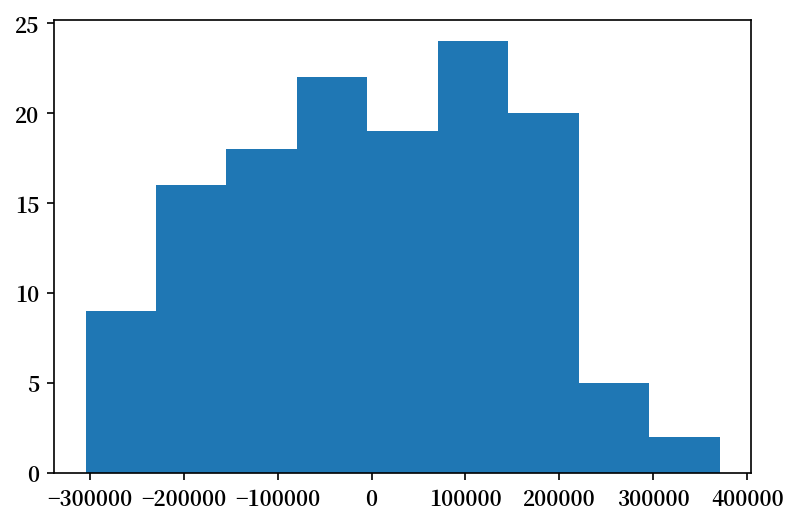

In [51]:
_ = plt.hist(results.resid, bins = "auto")

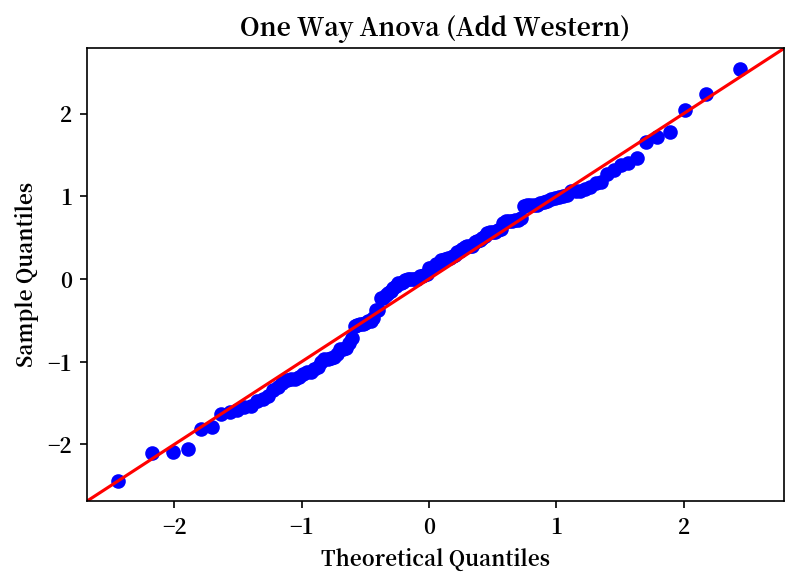

In [44]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
plt.title('One Way Anova (Add Western)')
plt.show()

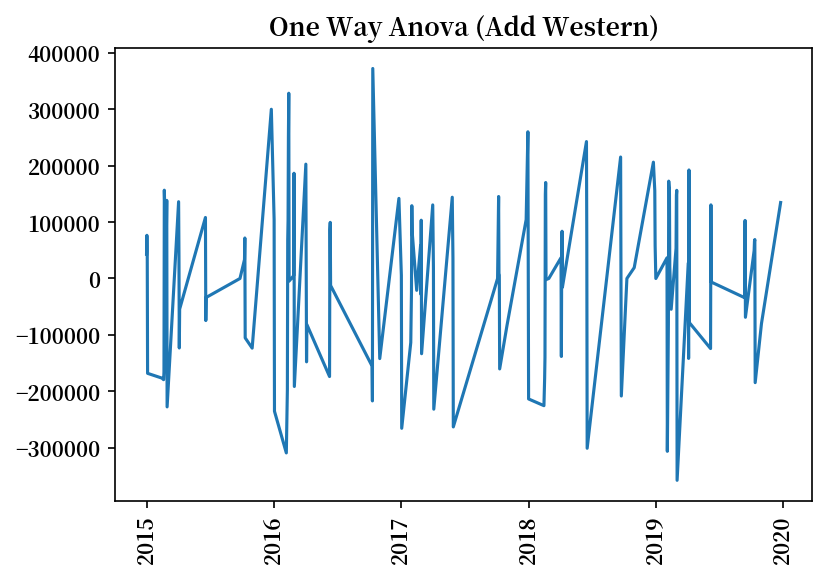

In [45]:
plt.plot(df2['Date'], results.resid)
plt.xticks(rotation = 90)
plt.title('One Way Anova (Add Western)')
plt.show()